# Airbnb Open Data
The following notebook contains a thorough preparation, cleansing and analysis of Airbnb data from Kaggle. Through this notebook I aim to answer the following questions: 

* What features do customers look for in Airbnbs? 
* What locations attract more customers and why ? 
* How do descriptions and ratings affect the traffic ? 

# Data Provenance

This data was uploaded to Kaggle by user **Azmoudeh** and can be accessed by [this link](https://www.kaggle.com/datasets/arianazmoudeh/airbnbopendata?resource=download). 

## Data Description

| Field                                        | Type     | Description                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          |
| -------------------------------------------- | -------- | ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------ |
| id                                           | integer  | Airbnb's unique identifier for the listing                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           |
| listing_url                                  | text     |                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      |
| scrape_id                                    | bigint   | Inside Airbnb "Scrape" this was part of                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              |
| last_scraped                                 | datetime | UTC. The date and time this listing was "scraped".                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   |
| source                                       | text     | One of "neighbourhood search" or "previous scrape". "neighbourhood search" means that the listing was found by searching the city, while "previous scrape" means that the listing was seen in another scrape performed in the last 65 days, and the listing was confirmed to be still available on the Airbnb site.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  |
| name                                         | text     | Name of the listing                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  |
| description                                  | text     | Detailed description of the listing                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  |
| neighborhood_overview                        | text     | Host's description of the neighbourhood                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              |
| picture_url                                  | text     | URL to the Airbnb hosted regular sized image for the listing                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         |
| host_id                                      | integer  | Airbnb's unique identifier for the host/user                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         |
| host_url                                     | text     | The Airbnb page for the host                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         |
| host_name                                    | text     | Name of the host. Usually just the first name(s).                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    |
| host_since                                   | date     | The date the host/user was created. For hosts that are Airbnb guests this could be the date they registered as a guest.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              |
| host_location                                | text     | The host's self reported location                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    |
| host_about                                   | text     | Description about the host                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           |
| host_response_time                           |          |                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      |
| host_response_rate                           |          |                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      |
| host_acceptance_rate                         |          | That rate at which a host accepts booking requests.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  |
| host_is_superhost                            | boolean  | [t=true; f=false]                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    |
| host_thumbnail_url                           | text     |                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      |
| host_picture_url                             | text     |                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      |
| host_neighbourhood                           | text     |                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      |
| host_listings_count                          | text     | The number of listings the host has (per Airbnb calculations)                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        |
| host_total_listings_count                    | text     | The number of listings the host has (per Airbnb calculations)                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        |
| host_verifications                           |          |                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      |
| host_has_profile_pic                         | boolean  | t=true; f=false                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      |
| host_identity_verified                       | boolean  | t=true; f=false                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      |
| neighbourhood                                | text     |                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      |
| neighbourhood_cleansed                       | text     | The neighbourhood as geocoded using the latitude and longitude against neighborhoods as defined by open or public digital shapefiles.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                |
| neighbourhood_group_cleansed                 | text     | The neighbourhood group as geocoded using the latitude and longitude against neighborhoods as defined by open or public digital shapefiles.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          |
| latitude                                     | numeric  | Uses the World Geodetic System (WGS84) projection for latitude and longitude.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        |
| longitude                                    | numeric  | Uses the World Geodetic System (WGS84) projection for latitude and longitude.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        |
| property_type                                | text     | Self selected property type. Hotels and Bed and Breakfasts are described as such by their hosts in this field                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        |
| room_type                                    | text     | [Entire home/apt|Private room|Shared room|Hotel]<br><br>All homes are grouped into the following three room types:<br><br>Entire place<br>Private room<br>Shared room<br>Entire place<br>Entire places are best if you're seeking a home away from home. With an entire place, you'll have the whole space to yourself. This usually includes a bedroom, a bathroom, a kitchen, and a separate, dedicated entrance. Hosts should note in the description if they'll be on the property or not (ex: "Host occupies first floor of the home"), and provide further details on the listing.<br><br>Private rooms<br>Private rooms are great for when you prefer a little privacy, and still value a local connection. When you book a private room, you'll have your own private room for sleeping and may share some spaces with others. You might need to walk through indoor spaces that another host or guest may occupy to get to your room.<br><br>Shared rooms<br>Shared rooms are for when you don't mind sharing a space with others. When you book a shared room, you'll be sleeping in a space that is shared with others and share the entire space with other people. Shared rooms are popular among flexible travelers looking for new friends and budget-friendly stays. |
| accommodates                                 | integer  | The maximum capacity of the listing                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  |
| bathrooms                                    | numeric  | The number of bathrooms in the listing                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               |
| bathrooms_text                               | string   | The number of bathrooms in the listing.<br>On the Airbnb web-site, the bathrooms field has evolved from a number to a textual description. For older scrapes, bathrooms is used.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     |
| bedrooms                                     | integer  | The number of bedrooms                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               |
| beds                                         | integer  | The number of bed(s)                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 |
| amenities                                    | json     |                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      |
| price                                        | currency | daily price in local currency                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        |
| minimum_nights                               | integer  | minimum number of night stay for the listing (calendar rules may be different)                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       |
| maximum_nights                               | integer  | maximum number of night stay for the listing (calendar rules may be different)                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       |
| minimum_minimum_nights                       | integer  | the smallest minimum_night value from the calender (looking 365 nights in the future)                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                |
| maximum_minimum_nights                       | integer  | the largest minimum_night value from the calender (looking 365 nights in the future)                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 |
| minimum_maximum_nights                       | integer  | the smallest maximum_night value from the calender (looking 365 nights in the future)                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                |
| maximum_maximum_nights                       | integer  | the largest maximum_night value from the calender (looking 365 nights in the future)                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 |
| minimum_nights_avg_ntm                       | numeric  | the average minimum_night value from the calender (looking 365 nights in the future)                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 |
| maximum_nights_avg_ntm                       | numeric  | the average maximum_night value from the calender (looking 365 nights in the future)                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 |
| calendar_updated                             | date     |                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      |
| has_availability                             | boolean  | [t=true; f=false]                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    |
| availability_30                              | integer  | avaliability_x. The availability of the listing x days in the future as determined by the calendar. Note a listing may not be available because it has been booked by a guest or blocked by the host.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                |
| availability_60                              | integer  | avaliability_x. The availability of the listing x days in the future as determined by the calendar. Note a listing may not be available because it has been booked by a guest or blocked by the host.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                |
| availability_90                              | integer  | avaliability_x. The availability of the listing x days in the future as determined by the calendar. Note a listing may not be available because it has been booked by a guest or blocked by the host.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                |
| availability_365                             | integer  | avaliability_x. The availability of the listing x days in the future as determined by the calendar. Note a listing may not be available because it has been booked by a guest or blocked by the host.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                |
| calendar_last_scraped                        | date     |                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      |
| number_of_reviews                            | integer  | The number of reviews the listing has                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                |
| number_of_reviews_ltm                        | integer  | The number of reviews the listing has (in the last 12 months)                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        |
| number_of_reviews_l30d                       | integer  | The number of reviews the listing has (in the last 30 days)                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          |
| first_review                                 | date     | The date of the first/oldest review                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  |
| last_review                                  | date     | The date of the last/newest review                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   |
| review_scores_rating                         |          |                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      |
| review_scores_accuracy                       |          |                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      |
| review_scores_cleanliness                    |          |                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      |
| review_scores_checkin                        |          |                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      |
| review_scores_communication                  |          |                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      |
| review_scores_location                       |          |                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      |
| review_scores_value                          |          |                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      |
| license                                      | text     | The licence/permit/registration number                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               |
| instant_bookable                             | boolean  | [t=true; f=false]. Whether the guest can automatically book the listing without the host requiring to accept their booking request. An indicator of a commercial listing.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            |
| calculated_host_listings_count               | integer  | The number of listings the host has in the current scrape, in the city/region geography.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             |
| calculated_host_listings_count_entire_homes  | integer  | The number of Entire home/apt listings the host has in the current scrape, in the city/region geography                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              |
| calculated_host_listings_count_private_rooms | integer  | The number of Private room listings the host has in the current scrape, in the city/region geography                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 |
| calculated_host_listings_count_shared_rooms  | integer  | The number of Shared room listings the host has in the current scrape, in the city/region geography                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  |
| reviews_per_month                            | numeric  | The number of reviews the listing has over the lifetime of the listing                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               |

# Imports 
Below is a list of imports required to run this notebook. 

In [1]:
import pandas as pd

# Cleaning / Importing the data

We will begin by importing the dataset using **pandas**. 

In [6]:
df=pd.read_csv("Airbnb_Open_Data.csv",dtype=object)
df.head()

id                                              NAME      host id  \
0  1001254                Clean & quiet apt home by the park  80014485718   
1  1002102                             Skylit Midtown Castle  52335172823   
2  1002403               THE VILLAGE OF HARLEM....NEW YORK !  78829239556   
3  1002755                                               NaN  85098326012   
4  1003689  Entire Apt: Spacious Studio/Loft by central park  92037596077   

  host_identity_verified host name neighbourhood group neighbourhood  \
0            unconfirmed  Madaline            Brooklyn    Kensington   
1               verified     Jenna           Manhattan       Midtown   
2                    NaN     Elise           Manhattan        Harlem   
3            unconfirmed     Garry            Brooklyn  Clinton Hill   
4               verified    Lyndon           Manhattan   East Harlem   

        lat       long        country  ... service fee minimum nights  \
0  40.64749  -73.97237  United States  ...       $193              10   
1  40.75362  -73.98377  United States  ...        $28              30   
2  40.80902   -73.9419  United States  ...       $124               3   
3  40.68514  -73.95976  United States  ...        $74              30   
4  40.79851  -73.94399  United States  ...        $41              10   

  number of reviews last review reviews per month review rate number  \
0                 9  10/19/2021              0.21                  4   
1                45   5/21/2022              0.38                  4   
2                 0         NaN               NaN                  5   
3               270    7/5/2019              4.64                  4   
4                 9  11/19/2018               0.1                  3   

  calculated host listings count availability 365  \
0                              6              286   
1                              2              228   
2                              1              352   
3                              1              322   
4                              1              289   

                                         house_rules license  
0  Clean up and treat the home the way you'd like...     NaN  
1  Pet friendly but please confirm with me if the...     NaN  
2  I encourage you to use my kitchen, cooking and...     NaN  
3                                                NaN     NaN  
4  Please no smoking in the house, porch or on th...     NaN  

[5 rows x 26 columns]

In [20]:
df["license"].unique()

array([nan, '41662/AL'], dtype=object)

It looks like the **license** column in the DataFrame is quite useless as all the rows have null values for the license column. As such I will be deleting the license column. 

In [3]:
df=df.drop(["license"], axis=1)
df.shape

(102599, 25)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype 
---  ------                          --------------   ----- 
 0   id                              102599 non-null  object
 1   NAME                            102349 non-null  object
 2   host id                         102599 non-null  object
 3   host_identity_verified          102310 non-null  object
 4   host name                       102193 non-null  object
 5   neighbourhood group             102570 non-null  object
 6   neighbourhood                   102583 non-null  object
 7   lat                             102591 non-null  object
 8   long                            102591 non-null  object
 9   country                         102067 non-null  object
 10  country code                    102468 non-null  object
 11  instant_bookable                102494 non-null  object
 12  cancellation_policy           

Based on the above cell, we can assume that most of the columns in the data are full, except for the columns **last review**, **reviews per month** and **house_rules**. However, we can perform sufficient analysis even with the lack of data in these columns, so I will not delete them. 

# Data exploration

To take a stab at this data, I will first plot a geospatial graph based on the longitude and latitude of all the AirBnBs in the dataset. I will be using **Tableau** for this purpose as, Tableau is an excellent tool for visual analysis. 

![Geospatial graph-2.png](<attachment:Geospatial graph-2.png>)

The graph is accessible on [tableau public](https://public.tableau.com/app/profile/kris.paul/viz/AirBnBdata_17057060393650/Geospatialgraph), where you can interact with it. Below is an image of New York for comparison with the heatmap. 
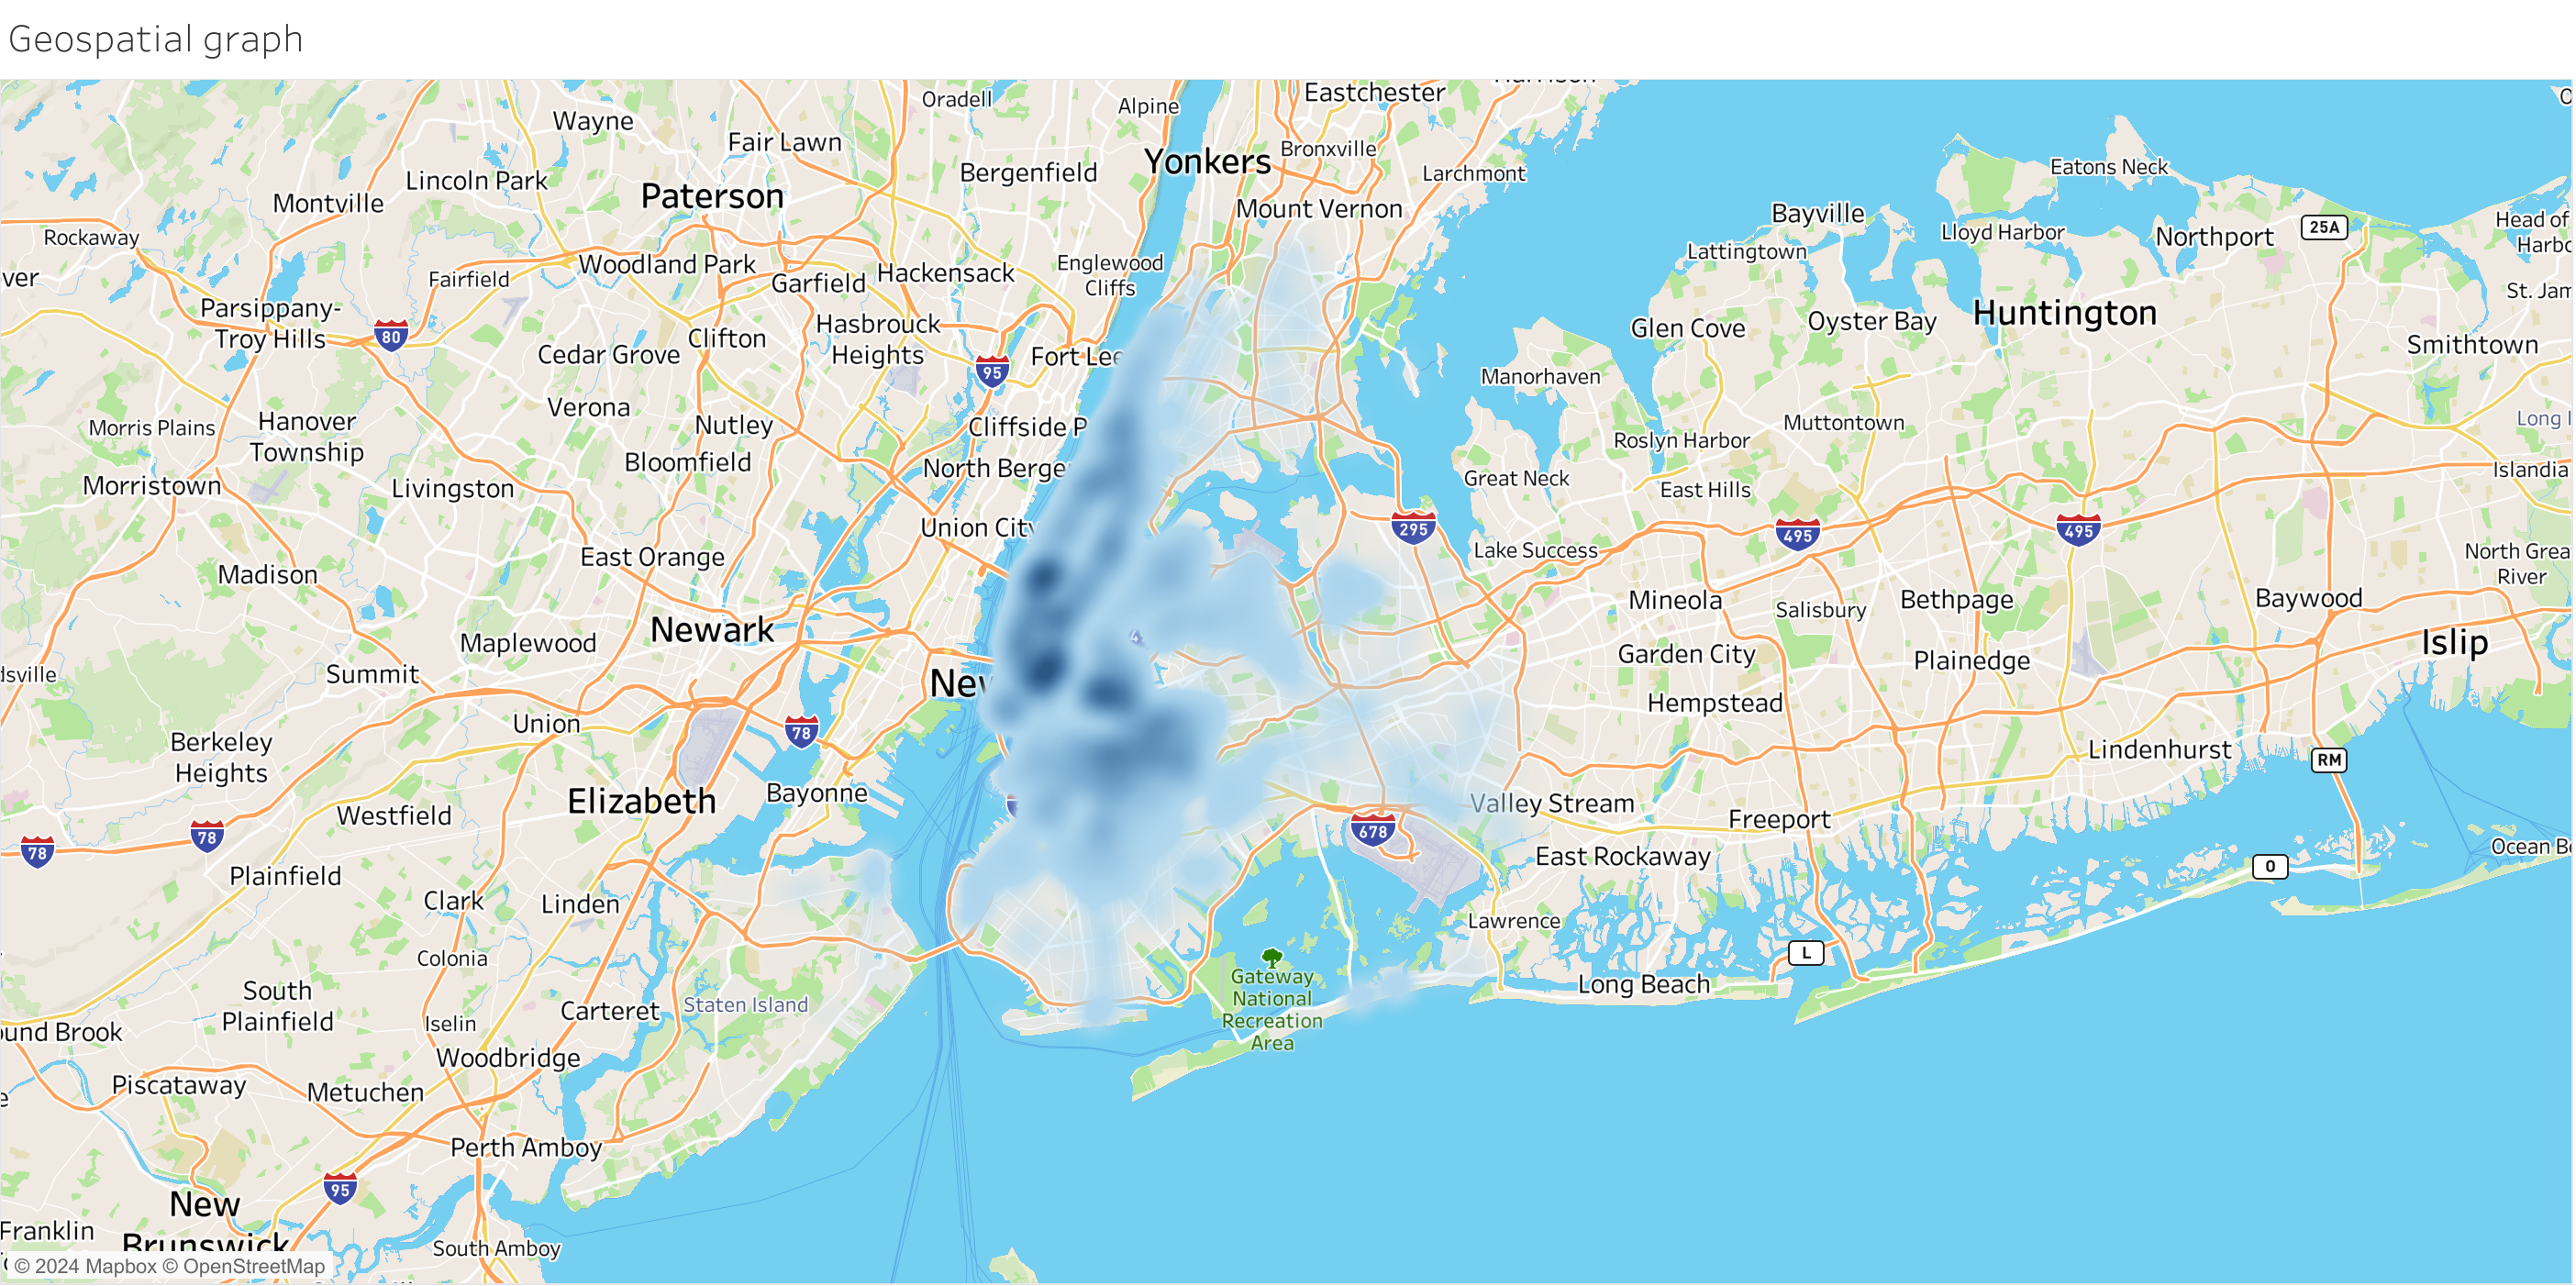

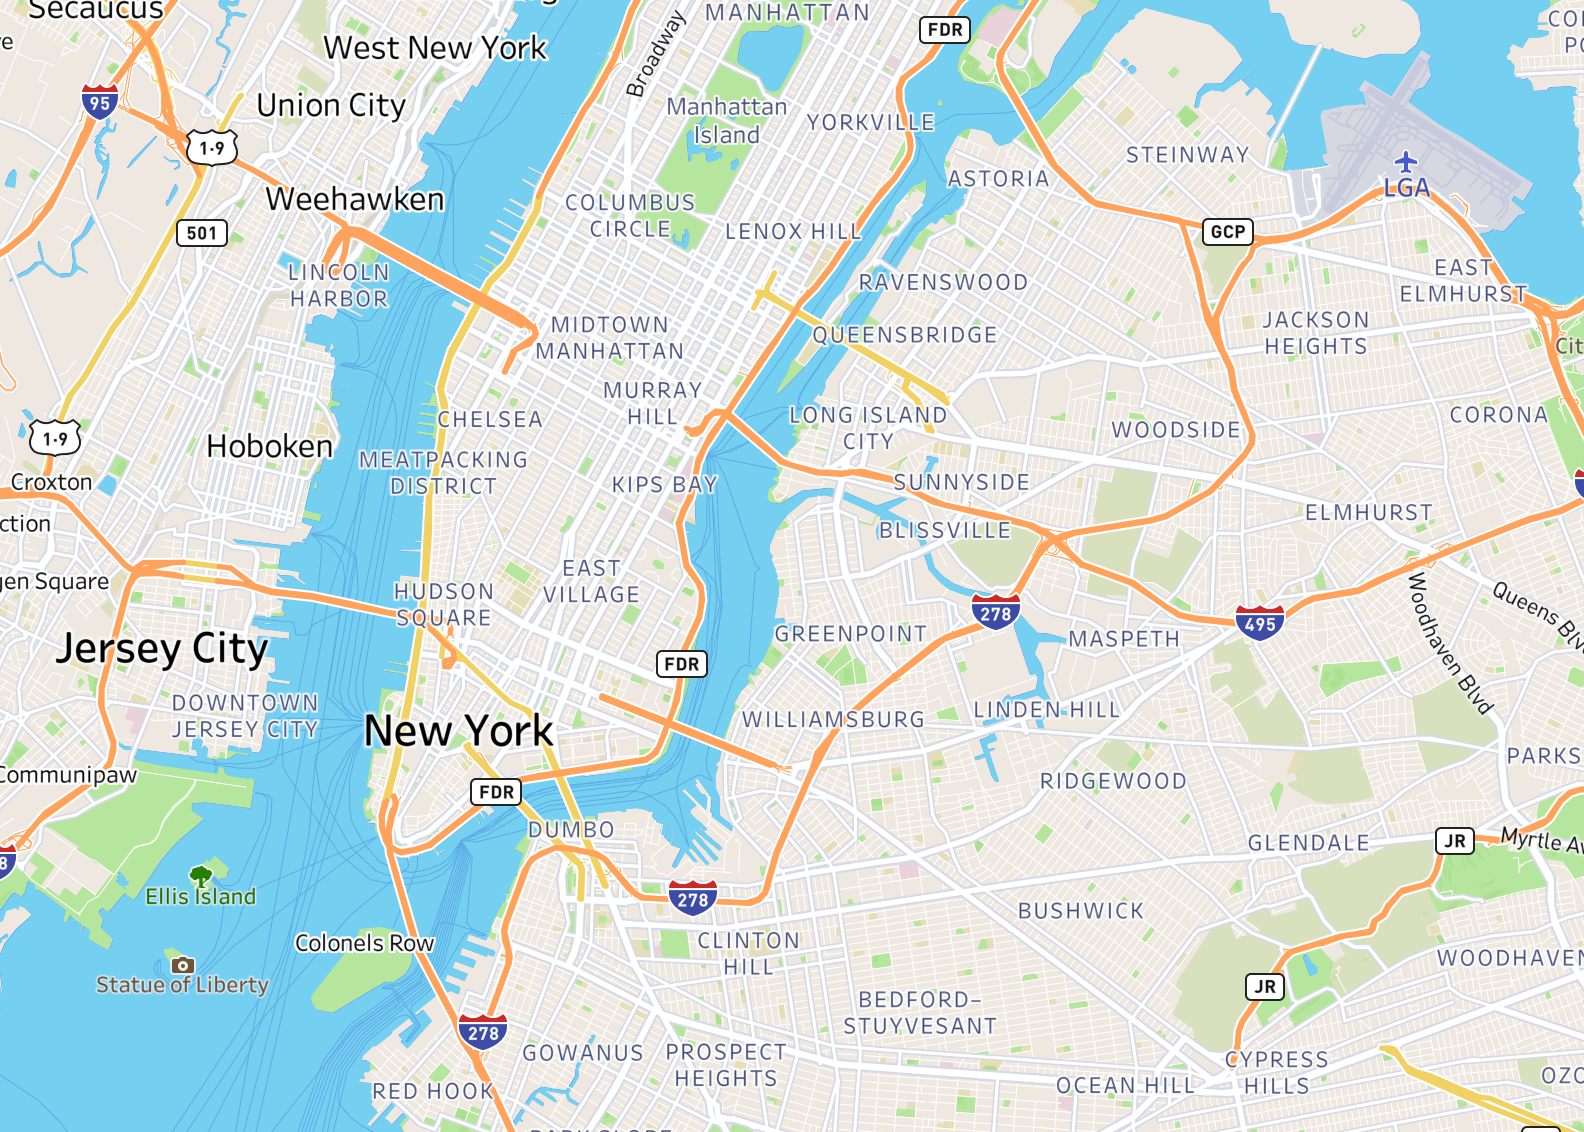

It's clear that most AirBnBs are concentrated around Hudson Square, MeatPacking District, and East Village. This is quite unsurprising as these areas comprise one of the hottest and priciest neighbourhoods in NYC. 